** Name: ** `SHUBHAM KUMAR`<br/>
** Roll Number: ** `16CE30018`<br/>
** Department: ** `CIVIL ENGINEERING`<br/>
** Email: ** `SHUBHAMKUMAR598@GMAIL.COM `

## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

### Aim : Implement a fully connected neural network from scratch in this problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''data is loaded from data directory.
please don't remove the folder '''

x_train = np.load('./data/X_train.npy')
x_train = x_train.flatten().reshape(-1,28*28)
x_train = x_train / 255.0
gt_indices = np.load('./data/y_train.npy')
train_length = len(x_train)
print("Number of training examples: {:d}".format(train_length))
x_train.shape

Number of training examples: 60000


(60000, 784)

In [3]:
'''Dimensions to be used for creating model'''

batch_size = 64  # batch size
input_dim = 784  # input dimension
hidden_1_dim = 512  # hidden layer 1 dimension
hidden_2_dim = 256  # hidden layer 2 dimension
output_dim = 10   # output dimension

'''Other hyperparameters'''
learning_rate = 1e-5

In [4]:
#creating one hot vector representation of output classification
y_train = np.zeros((train_length, output_dim))
 #print(y.shape, gt_indices.shape)
for i in range(train_length):
    y_train[i,gt_indices[i]] = 1

# Number of mini-batches (as integer) in one epoch
num_minibatches = np.floor(train_length/batch_size).astype(int) 
print(y_train.shape)

(60000, 10)


In [5]:
print("No of mini-batches {:d} and total training data used in training:\
{}.".format(num_minibatches, num_minibatches*batch_size))

No of mini-batches 937 and total training data used in training:59968.


In [6]:
'''Randomly Initialize Weights  from standard normal distribution (i.e., mean = 0 and s.d. = 1.0).
Using the dimesnions specified in the cell 3 to initialize  weights matrices. 
Using the nomenclature W1,W2 etc. (provided below) for the different weight matrices.'''

##########################  code ##############################################
W1 = np.random.normal(loc =0.0, scale = 1.0, size =(input_dim, hidden_1_dim))
W2 = np.random.normal(loc =0.0, scale = 1.0, size =(hidden_1_dim,hidden_2_dim))
W3 = np.random.normal(loc =0.0, scale = 1.0, size =(hidden_2_dim,output_dim))

###############################################################################################

In [7]:
# Softmax  function
def softmax(x):
    ##############################################################
    x = x - np.max(x, 1).reshape((-1, 1)) + 0.0000001
    ####################################################################################
    return np.exp(x)/np.expand_dims(np.sum(np.exp(x), 1), 1)
    ####################################################################################
    pass

 Epoch: 0, iteration: 0, Loss: 16.9816 
 Epoch: 1, iteration: 937, Loss: 2.8755 
 Epoch: 2, iteration: 1874, Loss: 2.1043 
 Epoch: 3, iteration: 2811, Loss: 2.0148 
 Epoch: 4, iteration: 3748, Loss: 1.7269 
 Epoch: 5, iteration: 4685, Loss: 1.7273 
 Epoch: 6, iteration: 5622, Loss: 1.7269 
 Epoch: 7, iteration: 6559, Loss: 1.7269 
 Epoch: 8, iteration: 7496, Loss: 1.4327 
 Epoch: 9, iteration: 8433, Loss: 1.1513 
 Epoch: 10, iteration: 9370, Loss: 1.1698 
 Epoch: 11, iteration: 10307, Loss: 1.1613 
 Epoch: 12, iteration: 11244, Loss: 1.1443 
 Epoch: 13, iteration: 12181, Loss: 0.9642 
 Epoch: 14, iteration: 13118, Loss: 0.8639 
 Epoch: 15, iteration: 14055, Loss: 0.8635 
 Epoch: 16, iteration: 14992, Loss: 0.8635 
 Epoch: 17, iteration: 15929, Loss: 0.8635 
 Epoch: 18, iteration: 16866, Loss: 0.8635 
 Epoch: 19, iteration: 17803, Loss: 0.8635 
 Epoch: 20, iteration: 18740, Loss: 0.8635 
 Epoch: 21, iteration: 19677, Loss: 0.8635 


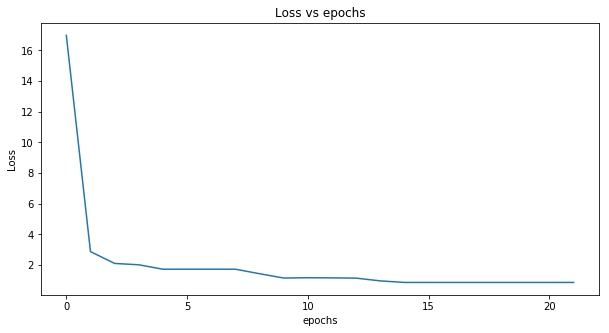

In [8]:
no_of_iterations = 20000
loss_list=[]
i_epoch = 0
for i_iter in range(no_of_iterations):
    
    ''''''
    batch_elem_idx = i_iter%num_minibatches
    x_batchinput = x_train[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size]
    
    ######################### Forward Pass Block #####################################
    '''code for forward block of the neural network with 2 hidden layers.
    '''
    
    # first hidden layer implementation
    a1 = np.matmul(x_batchinput, W1)
    # implement Relu layer
    h1 = np.maximum(0, a1)
    #  implement 2 hidden layer
    a2 = np.matmul(h1, W2)
    # implement Relu activation 
    h2 = np.maximum(0, a2)
    #implement linear output layer
    a3 = np.matmul(h2, W3)
    # softmax layer
    softmax_score = softmax(a3)
    
    ##################################################################################
    ###############################################################################################
    
    neg_log_softmax_score = -np.log(softmax_score+0.00000001) # The small number is added to avoid 0 input to log function
    
    # Compute and print loss
    y_batch = y_train[batch_elem_idx*batch_size : (batch_elem_idx + 1)*batch_size]
    
    if i_iter%num_minibatches == 0:
        loss = np.mean(np.diag(np.take(neg_log_softmax_score, gt_indices[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size],\
                                       axis=1)))
        print(" Epoch: {:d}, iteration: {:d}, Loss: {:6.4f} ".format(i_epoch, i_iter, loss))
        loss_list.append(loss)
        i_epoch += 1
        # Each 10th epoch reduce learning rate by a factor of 10
        if i_epoch%10 == 0:
            learning_rate /= 10.0
     
    ################################### Backpropagation Code Block #####################################
    ''' Use the convention grad_{} for computing the gradients.
    for e.g 
        grad_W1 for gradients w.r.t. weight W1
        grad_w2 for gradients w.r.t. weights W2'''
    
    # Gradient of cross-entropy loss w.r.t. preactivation of the output layer
    grad_softmax_score = softmax_score - y_batch
    
    # gradient w.r.t W3
    grad_W3 = np.matmul(h2.transpose(), grad_softmax_score)
    # gradient w.r.t h2
    grad_h2 = np.matmul( grad_softmax_score, W3.transpose())
    # gradient w.r.t a2
    grad_a2 = np.zeros(a2.shape, dtype = np.float64)
    grad_a2[a2 > 0] = grad_h2[a2 > 0]
    # gradient w.r.t W2
    grad_W2 = np.matmul(h1.transpose(), grad_a2)
    # gradient w.r.t h1
    grad_h1 = np.matmul(grad_a2, W2.transpose())
    # gradient w.r.t a1
    grad_a1 = np.zeros(a1.shape, dtype = np.float64)
    grad_a1[a1 > 0] = grad_h1[a1 > 0]
    # gradient w.r.t W1
    grad_W1 = np.matmul(x_batchinput.transpose(), grad_a1)
    
    ###############################################################################################
    ####################################################################################################
    
    
    ################################ Updating Weights Block using SGD ####################################
    W3 -= learning_rate * grad_W3
    W2 -= learning_rate * grad_W2
    W1 -= learning_rate * grad_W1
    ####################################################################################################
    
#plotting the loss
plt.figure(figsize=(10,5))
plt.plot(loss_list)
plt.title('Loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [9]:
'''Loading the test data from data/X_test.npy and data/y_test.npy.'''
x_test = np.load('./data/X_test.npy')
x_test = x_test.flatten().reshape(-1,28*28)
x_test = x_test / 255.0
y_test = np.load('./data/y_test.npy')
x_test.shape

(10000, 784)

In [10]:
batch_size_test = 100 # Deliberately taken 100 so that it divides the test data size
num_minibatches = len(y_test)/batch_size_test
test_correct = 0

'''Only forward block code and compute softmax_score .'''
for i_iter in range(int(num_minibatches)):
    
    '''Get one minibatch'''
    batch_elem_idx = i_iter%num_minibatches
    x_batchinput = x_test[i_iter*batch_size_test:(i_iter+1)*batch_size_test]
    
    ###################
    # first hidden layer implementation
    # first hidden layer implementation
    a1 = np.matmul(x_batchinput, W1)
    # implement Relu layer
    h1 = np.maximum(0, a1)
    #  implement 2 hidden layer
    a2 = np.matmul(h1, W2)
    # implement Relu activation 
    h2 = np.maximum(0, a2)
    #implement linear output layer
    a3 = np.matmul(h2, W3)
    # softmax layer
    softmax_score = softmax(a3) 
    ##################################################################################
    
    y_batchinput = y_test[i_iter*batch_size_test:(i_iter+1)*batch_size_test]
    
    y_pred = np.argmax(softmax_score, axis=1)
    num_correct_i_iter = np.sum(y_pred == y_batchinput)
    test_correct += num_correct_i_iter
print ("Test accuracy is {:4.2f} %".format(test_correct/len(y_test)*100))

Test accuracy is 91.76 %
